# Урок 7

## Линейная регрессия. Однофакторный дисперсионный анализ. A/B-тестирование

В общем виде __модель регрессии__ — это любая модель зависимости (__объясняемой__) количественной переменной $y$ от другой или нескольких других переменных (__факторов__) $x_i$. Такую модель можно записать в виде:
$$y = f_b(x_1, \dots, x_m) + \varepsilon,$$
где $f_b(x)$ — некоторая функция, имеющая набор параметров $b$, а $\varepsilon$ — случайная ошибка. При этом на ошибку накладывается условие, что её математическое ожидание равно $0$:
$$M(\varepsilon) = 0$$

Модель регрессии называется __линейной__, если функция $f_b(x)$ является линейной, т.е. модель имеет вид:
$$y = b_0 + b_1 x_1 + \dots + b_m x_m + \varepsilon$$

__В чём здесь суть__. Участвующие в этой модели переменные удобно воспринимать как некоторые случайные величины. В этом случае можно всегда подобрать параметры $b$ так, чтобы такое равенство выполнялось прямо на уровне случайных величин.

Важным частным случаем линейной регрессии является __парная регрессия__. При парной регрессии используется только один фактор, т.е. модель имеет вид:
$$y = b_0 + b_1 x + \varepsilon$$

На практике такая модель имеет вид:
$$Y = b_0 + b_1 X + E,$$
где $X$ — значения фактора $x$, $Y$ — значения переменной $y$, $E$ — значения ошибок модели на каждом объекте (т.е. реализации случайной величины $\varepsilon$). В этом случае условие $M(\varepsilon) = 0$ трансформируется в условие $\overline{E} = 0$, где $\overline{E}$ — выборочное среднее ошибок.

__Коэффициенты парной регрессии__ можно найти по формуле:
$$b_1 = \frac{\sigma_{XY}}{\sigma^2_X}, \:\:
b_0 = \overline{Y} - b_1 \cdot {\overline{X}},$$
где $\sigma^2_X$ — выборочная дисперсия, $\sigma_{XY}$ — выборочная ковариация.

__Пример 1__

Рассмотрим данные со значениями площадей квартир в квадратных метрах (массив `x1`) и соответствующими им ценами на квартиры в тысячах долларов (массив `y1`), приведеннные для $12$ наблюдений. По этим данным построим модель линейной регрессии.

In [1]:
import numpy as np

In [2]:
x1 = np.array([80, 90, 85, 115, 85, 85, 90, 80, 105, 110, 65, 100])
y1 = np.array([150, 160, 155, 175, 140, 150, 140, 155, 165, 190, 140, 165])

Найдём коэффициенты линейной регрессии:

In [5]:
b1 = np.cov(x1, y1, ddof=1)[0, 1] / np.var(x1, ddof=1)
b0 = y1.mean() - b1 * x1.mean()

b0, b1

(77.8996282527881, 0.8717472118959109)

_Замечание_. В данной формуле не нужно обязательно использовать смещённую или несмещённую оценку, но важно, конечно, использовать один и тот же тип оценки и для ковариации, и для дисперсии.

Итак, модель линейной регрессии имеет вид:
$$y = 77.9 + 0.87 \cdot x,$$
т.е. с увеличением площади квартиры на $1$ квадратный метр цена возрастет на $0.87$ тысячи долларов. Визуализируем полученные результаты на графике.

In [6]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

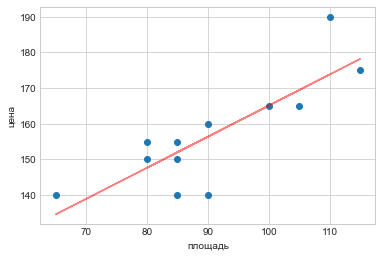

In [7]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('площадь')
plt.ylabel('цена');

Проверим, что средняя ошибка модели действительно равна нулю. Для этого запишем массив из предсказанных значений:

In [8]:
x1

array([ 80,  90,  85, 115,  85,  85,  90,  80, 105, 110,  65, 100])

In [9]:
z1 = b0 + b1 * x1

z1

array([147.6394052 , 156.35687732, 151.99814126, 178.15055762,
       151.99814126, 151.99814126, 156.35687732, 147.6394052 ,
       169.4330855 , 173.79182156, 134.56319703, 165.07434944])

Теперь из него получим массив ошибок:

In [10]:
e1 = y1 - z1

e1

array([  2.3605948 ,   3.64312268,   3.00185874,  -3.15055762,
       -11.99814126,  -1.99814126, -16.35687732,   7.3605948 ,
        -4.4330855 ,  16.20817844,   5.43680297,  -0.07434944])

Средняя ошибка:

In [11]:
e1.mean()

9.473903143468002e-15

__Метод наименьших квадратов__

В общем случае, когда факторов больше одного, коэффициенты можно подобрать с помощью __метода наименьших квадратов__. Здесь $X$ — это уже не просто выборка, а матрица объект-признак, т.е. элемент $x_{ij}$ из этой матрицы является $j$-м признаком $i$-го объекта.

Для удобства записи метода наименьших квадратов в первую очередь введём дополнительный «фактор» $x_0 = 1$. Это делается для того, чтобы модель можно было записать в матричном виде:
$$Y = X \cdot b + E,$$
где $X$ — такая расширенная матрица объект-признак (первый столбец которой полностью состоит из единиц), $b = (b_0, b_1, \dots, b_m)$ — вектор коэффициентов модели, операция «$\cdot$» — матричное умножение.

__Метод наименьших квадратов__ заключается в минимизации расстояния между векторами $Y$ и $X \cdot b$:
$$\| Y - X \cdot b \| \rightarrow \min_b$$
При этом вводится дополнительное условие на среднюю ошибку:
$$\overline{E} = 0,$$
где $E = Y - X \cdot b$. Решение такой оптимизационной задачи даёт __коэффициенты линейной регрессии__:
$$b = (X^\top X)^{-1} X^\top Y$$

_Замечание_. У метода наименьших квадратов есть один изъян: в случае, когда в матрице $X$ представлены линейно зависимые (или близкие к этому) признаки, вычисление обратной матрицы $(X^\top X)^{-1}$ становится проблематичным. В таких ситуациях стоит сперва избавиться от линейно зависимых признаков (это задача _факторного анализа_, который мы рассмотрим на занятии 8).

__Пример 2__

Рассмотрим данные о хоккеистах и попробуем построить модель регрессии, которая будет предсказывать возраст хоккеиста по его росту и весу.

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('hockey_players.csv')
df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


In [14]:
x2 = df[['height', 'weight']].values

y2 = df['age'].values
y2

array([24.95277207, 21.11978097, 25.229295  , ..., 26.82546201,
       26.01232033, 20.39698836])

К матрице $X$ (массив `x2`) нужно также добавить столбец из $1$, соответствующий фиктивному фактору.

In [15]:
x2.shape

(3294, 2)

In [16]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))

In [17]:
x2.shape

(3294, 3)

In [18]:
x2

array([[  1., 185.,  84.],
       [  1., 188.,  86.],
       [  1., 182.,  95.],
       ...,
       [  1., 191.,  88.],
       [  1., 188.,  89.],
       [  1., 193.,  95.]])

Запишем матрицу $X^\top X$ и посчитаем её определитель.

In [19]:
XTX = x2.T.dot(x2)

np.linalg.det(XTX)

27479241781875.965

Определитель не близок к нулю, поэтому проблем с методом нет. Коэффициенты модели:

In [20]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[50.41616613 -0.21077511  0.16818038]


Итак, наша модель регрессии имеет вид:
$$y = 50.4162 - 0.2108 \cdot x_1 + 0.1682 \cdot x_2,$$
где $x_1$ — рост хоккеиста, $x_2$ — вес хоккеиста.

Также проверим, что средняя ошибка модели равна $0$:

In [22]:
z2 = x2.dot(b)
e2 = y2 - z2

e2

array([-0.59714968, -4.13417619, -2.80293622, ...,  1.86746944,
        0.25382204, -5.31671662])

In [23]:
e2.mean()

6.790424392244235e-12

__Коэффициент детерминации__

Рассмотрим случайную ошибку
$$\varepsilon = y - x \cdot b$$

Коэффициенты модели линейной регрессии подбираются так, чтобы математическое ожидание ошибки было равно нулю:
$$M(\varepsilon) = 0$$

Теперь качество модели определяет дисперсия ошибки $D(\varepsilon)$. Если и математическое ожидание, и дисперсия ошибки близки к нулю, это свидетельствует о высоком качестве модели, т.е. в этом случае модель хорошо соответствует имеющимся данным. Эта интуиция приводит нас к __коэффициенту детерминации__:
$$R^2 = 1 - \dfrac{D(\varepsilon)}{D(y)}$$

Коэффициент детерминации принимает значения из интервала $[0, 1]$. Близкие к $1$ значения коэффициента детерминации свидетельствуют о высоком качестве модели.

Чтобы посчитать коэффициент детерминации, построим «предсказанные» моделью значения
$$Z = X \cdot b$$

Пусть $SS_Y = \displaystyle\sum_{i = 1}^n (y_i - \overline{Y})^2$ — сумма квадратов отклонений значений массива $Y$ от среднего, а $SS_{res}$ — _остаточная сумма квадратов отклонений_, т.е. сумма квадратов отклонений элементов массива $Z - Y$ от их среднего.

__Коэффициент детерминации__:
$$R^2 = 1 - \dfrac{SS_{res}}{SS_{y}}$$

__Пример 3__

Посчитаем коэффициент детерминации для модели из предыдущих примеров. Для примера 1:

In [24]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [25]:
R1 = 1 - sum_of_squares(e1) / sum_of_squares(y1)
R1

0.6752261641274685

Коэффициент детерминации, равный $0.6752$, означает, что $67 \%$ дисперсии переменной $y$ _учитывается_ или _объясняется_ моделью. Оставшиеся $33 \%$ обусловлены какими-то ещё факторами, которые при построении модели не учитывались.

Также посчитаем коэффициент деретминации для примера 2:

In [26]:
R2 = 1 - sum_of_squares(e2) / sum_of_squares(y2)
R2

0.046415176959559434

Как мы видим, коэффициент детерминации для второй модели оказался очень низок. Признаки, которые мы выбрали, объясняют лишь малый процент дисперсии переменной $y$:

In [27]:
z2.var(), y2.var()

(0.8369629982452931, 18.03209753944778)

Несмотря на то, что теоретически коэффициент детерминации принимает значения от $0$ до $1$, значение коэффициента детерминации ниже $1$ не означает, что модель построена плохо (и могла бы быть лучше). 

Рассмотрим модель, построенную с помощью метода наименьших квадратов. (Напомним, что такая модель является наилучшей моделью линейной регрессии, которую можно построить на имеющихся данных.) Пусть $r_{YZ}$ — коэффициент корреляции Пирсона между массивами $Y$ и $Z$. Оказывается, в таком случае справедливо равенство:
$$R^2 = r_{YZ}^2$$

Таким образом, коэффициент детерминации прямо зависит от уровня корреляции в данных и не может достигнуть $1$, если в данных нет линейной зависимости.

__Пример 4__

Сгенерируем два набора данных: в одном корреляция между признаками высокая, в другом — низкая. Построим для каждого набора модель линейной регрессии и посчитаем коэффициент детерминации.

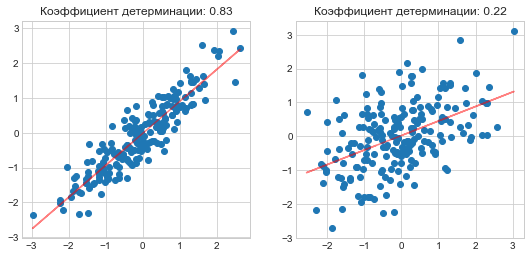

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(9, 4)

x, y = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.9], [0.9, 1]], size=200).T
b1_ = np.cov(x, y)[0, 1] / np.var(x)
b0_ = y.mean() - b1_ * x.mean()

ax1.scatter(x, y)
ax1.plot(x, b0_ + b1_ * x, color='red', alpha=0.5)
ax1.set_title(f'Коэффициент детерминации: {round(np.corrcoef(x, y)[0, 1] ** 2, 2)}')

x, y = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.4], [0.4, 1]], size=200).T
b1_ = np.cov(x, y)[0, 1] / np.var(x)
b0_ = y.mean() - b1_ * x.mean()

ax2.scatter(x, y)
ax2.plot(x, b0_ + b1_ * x, color='red', alpha=0.5)
ax2.set_title(f'Коэффициент детерминации: {round(np.corrcoef(x, y)[0, 1] ** 2, 2)}')

plt.show()

Как мы видим, хорошее качество первой модели и низкое качество второй обусловлены не качеством проделанной работы, а наличием зависимости в данных.

### Статистический анализ уравнения регрессии

Итак, ранее мы установили, что верхняя граница коэффициента детерминации для модели линейной регрессии, построенной по имеющимся данным, не всегда равна $1$. Так как же тогда определить, какой коэффициент детерминации означает значимый уровень соответствия модели данным, а какой — нет?

Для таких целей существует т.н. __F-тест Фишера__. Формально при таком тесте проверяется нулевая гипотеза о том, что теоретический коэффициент детерминации (т.е. для модели, построенной для случайных величин) равен $0$, т.е. что в имеющихся данных вообще нет никакой зависимости. 

При F-тесте используется статистика:
$$F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)},$$
где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $m$ — число факторов. Такая статистика в предположении верности нулевой гипотезы имеет __F-распределение Фишера__ с параметрами $k_1 = m$, $k_2 = n - m - 1$.

Распределение Фишера имеет один хвост, поэтому рассматривается правосторонняя критическая область $\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right)$, где $t_{\beta, \: k_1, k_2}$ — квантиль порядка $\beta$ для распределения Фишера с параметрами $k_1$, $k_2$.

Если статистика попадает в критическую область, то гипотеза о равенстве нулю коэффициента детерминации отвергается. Это означает, что построенная нами модель значимо соответствует данным.

__Пример 5__

Проверим значимость уравнений регрессии, построенных в первом и втором примерах. В первом примере:

In [29]:
n = x1.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 10)

Возьмём уровень значимости $\alpha = 0.05$. Нужный нам квантиль можно посчитать с помощью функции `scipy.stats.f.ppf`:

In [30]:
from scipy import stats

In [31]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.9646027437307145

Итак, критическая область:
$$\Omega_\alpha = \left( 4.96, \infty \right)$$

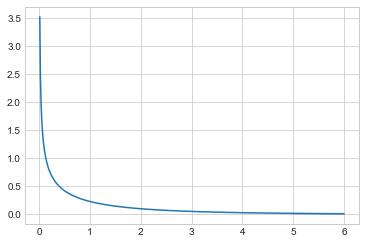

In [39]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

# plt.ylim(0, 0.5)

Считаем значение статистики:

In [40]:
F = (R1 / k1) / ((1 - R1) / k2)
F

20.79065766838693

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

Теперь то же самое для второго примера.

In [41]:
n = x2.shape[0]
m = x2.shape[1] - 1  # поскольку добавляли фиктивный столбец

k1 = m
k2 = n - m - 1

k1, k2

(2, 3291)

Критическая область:

In [42]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

2.9984608850665975

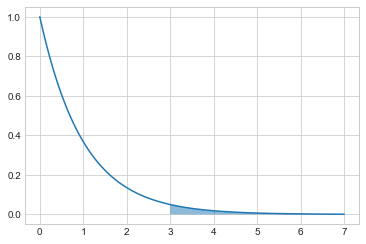

In [43]:
ox = np.linspace(0, 7, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 7, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

Статистика:

In [44]:
F = (R2 / k1) / ((1 - R2) / k2)
F

80.09373874411591

Второе уравнение регрессии также признаётся значимым.

__Доверительные интервалы для коэффициентов парной регрессии__

В случае парной регрессии можно построить доверительные интервалы для коэффициентов регрессии.

__Смысл__ доверительных интервалов тут в том, что, как мы уже отмечали ранее, модель линейной регрессии можно построить прямо по случайным величинам. Это значит, что, построив модель по имеющимся данным, можно построить доверительные интервалы и посмотреть, насколько далеко могут быть реальные значения коэффициентов регрессии от построенных нами.

Начнём с коэффициента наклона $b_1$. Допустим, мы получили коэффициент наклона $\hat{b}_1$, и пусть $b_1$ — реальное значение этого коэффициента. Рассмотрим статистику
$$t = \dfrac{\hat{b}_1 - b_1}{S_{slope}},$$
где $S_{slope}$ — __стандартная ошибка коэффициента наклона__:
$$S_{slope} = \sqrt{\dfrac{\frac{1}{n - 2} \displaystyle\sum_{i=1}^{n}e_i^2}{\displaystyle\sum_{i=1}^n (x_i - \overline{X})^2}}$$
Здесь $e_i$ — значение ошибки на $i$-м объекте, т.е. $e_i = y_i - z_i$.

Статистика $t$ имеет распределение Стьюдента с параметром $df = n - 2$. Отсюда можно, имея доверительную вероятность $p$, построить __доверительный интервал для коэффициента наклона__ по формуле:
$$P \left( \hat{b}_1 + t_{\alpha/2, \: n - 2} \cdot S_{slope} \leq b_1 \leq \hat{b}_1 + t_{1 - \alpha/2, \: n - 2} \cdot S_{slope} \right) = p,$$
где $\alpha = 1 - p$, $t_{\beta, n - 2}$ — квантиль порядка $\beta$ для распределения Стьюдента.

Аналогично можно построить доверительный интервал для коэффициента сдвига $b_0$. __Стандартная ошибка коэффициента сдвига__ вычисляется по формуле:
$$S_{intercept} = S_{slope} \cdot \sqrt{\dfrac{1}{n} \displaystyle\sum_{i=1}^n x_i^2}$$

Статистика
$$t = \dfrac{\hat{b}_0 - b_0}{S_{intercept}}$$
также имеет распределение Стьюдента с параметром $df = n - 2$. Итак, __доверительный интервал для коэффициента наклона__:
$$P \left( \hat{b}_0 + t_{\alpha/2, \: n - 2} \cdot S_{intercept} \leq b_0 \leq \hat{b}_0 + t_{1 - \alpha/2, \: n - 2} \cdot S_{intercept} \right) = p$$

__Пример 6__

В примере 1 мы получили модель парной регрессии с коэффициентами:

In [45]:
b0, b1

(77.8996282527881, 0.8717472118959109)

Построим для коэффициента наклона доверительный интервал.

In [46]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [47]:
s_slope = standard_error_slope(x1, y1, z1)
s_slope

0.19118616125822915

Зададим уровень доверия $p = 0.95$, т.е. $\alpha = 0.05$. Найдём нужный нам квантиль.

In [48]:
alpha = 0.05
n = x1.shape[0]

t1 = stats.t.ppf(alpha / 2, df=n - 2)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 2)

t1, t2

(-2.2281388519649385, 2.2281388519649385)

Доверительный интервал для параметра $b_1$:

In [49]:
(b1 + t1 * s_slope, b1 + t2 * s_slope)

(0.44575789803841653, 1.2977365257534053)

Аналогично для параметра $b_0$:

In [50]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [51]:
s_intercept = standard_error_intercept(x1, y1, z1)
s_intercept

17.56157028615461

Квантиль нам подойдёт тот же самый. Итак, доверительный интервал для параметра $b_0$:

In [52]:
(b0 + t1 * s_intercept, b0 + t2 * s_intercept)

(38.770011196694, 117.02924530888221)

__(Дополнительно) Доверительные интервалы для коэффициентов многомерной регрессии__

Доверительные интервалы можно посчитать и для коэффициентов многомерной регрессии. Как и ранее, нам понадобятся средние квадратические отклонения (т.е. стандартные ошибки) для каждого коэффициента, а также число степеней свободы, чтобы считать квантили распределения Стьюдента.

Средние квадратические отклонения коэффициентов регрессии располагаются (доказательство [тут](https://en.wikipedia.org/wiki/Proofs_involving_ordinary_least_squares#Least_squares_estimator_for_β)) на диагонали матрицы
$$\Sigma = \sigma_{res}^2 \cdot (X^\top X)^{-1},$$
где $\sigma_{res}^2$ — выборочная дисперсия по массиву ошибок $E$. Её можно посчитать по формуле:
$$\sigma_{res}^2 = \dfrac{1}{n - m - 1} \displaystyle\sum_{i = 1}^n (e_i - \overline{E})^2$$

Коэффициенты линейной регрессии имеют распределение Стьюдента с $n - m - 1$ степенями свободы. Итак, доверительный интервал для $j$-го коэффициента регрессии будет выглядеть следующим образом:
$$P \left( \hat{b}_j + t_{\alpha/2, \: n - m - 1} \cdot \Sigma_{jj} \leq b_j \leq \hat{b}_j + t_{1 - \alpha/2, \: n - m - 1} \cdot \Sigma_{jj} \right) = p,$$
где $\Sigma_{jj}$ — диагональный элемент матрицы $\Sigma$ (стоящий на позиции $(j, j)$), $t_{\beta, \: n - m - 1}$ — квантиль порядка $\beta$ для распределения Стьюдента с параметром $df = n - m - 1$.

__Зачем это нужно__

Зачем нужны эти доверительные интервалы? Они позволяют оценить реальный вклад каждого фактора в итоговую переменную. Например, если доверительный интервал коэффициента содержит $0$, это свидетельствует о том, что соответствующий фактор не вносит значимого вклада в переменную.

__Резюме__

Итак, подытожим весь описанный выше регрессионный анализ и возникающие в процессе величины:
* Непосредственно факт наличия линейной взаимосвязи проверяется с помощью корреляционного анализа.
* Если линейная зависимость наблюдается, можно построить модель линейной регрессии. Она укажет на характер этой зависимости (т.е. на то, каким именно образом изменяется переменная под влиянием факторов).
* С помощью F-критерия Фишера можно проверить, является ли уровень зависимости в данных статистически значимым.
* С помощью доверительных интервалов можно оценить реальный вклад каждого фактора в изменение переменной.

### Дисперсионный анализ

__Дисперсионный анализ__ — метод в математической статистике, направленный на поиск зависимостей в данных, в которых целевая переменная является _количественной_, а факторы являются _категориальными_.

В __однофакторном дисперсионном анализе__ исследуется влияние одного категориального фактора $x$ на переменную $y$. Допустим, у фактора $x$ имеется $k$ разных значений или __уровней__. На практике это означает, что у нас имеется $k$ выборок:
$$Y_1, \dots, Y_k,$$
и выборка $Y_i$ соответствует значениям переменной $y$ на $i$-м уровне фактора $x$.

Итак, нулевая гипотеза $H_0$ утверждает, что средние по всем этим выборкам равны:
$$H_0: \:\: \overline{Y_1} = \dots = \overline{Y_k}$$

Другими словами, нулевая гипотеза заключается в том, что фактор $x$ никак не влияет на значения переменной $y$.

Для проверки гипотез в дисперсионном анализе также используется __F-критерий Фишера__. Используемая статистика представляет из себя отношение дисперсии между уровнями к дисперсии внутри уровней.

Пусть в каждой выборке $Y_i$ содержится $n_i$ элементов. Обозначим через $Y$ объединение всех выборок, т.е. выборку размера $n = n_1 + \dots + n_k$.

Рассмотрим две суммы квадратов:
$$SS_b = \displaystyle\sum_{i=1}^k \left( \overline{Y_i} - \overline{Y} \right)^2 n_i, \:\:
SS_w = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} \left( y_{ij} - \overline{Y_i} \right)^2,$$
где $y_{ij}$ — $j$-й элемент $i$-й выборки.

Первая сумма — отклонения между группами («b» от слова Between — между), вторая — отклонения внутри групп («w» от слова Within — внутри).

По этим значениям вычисляются соответствующие несмещённые оценки дисперсий:
$$\sigma_b^2 = \dfrac{SS_b}{k - 1}, \:\: \sigma_w^2 = \dfrac{SS_w}{n - k}$$

Итак, статистика для проверки гипотезы $H_0$:
$$F = \dfrac{\sigma_b^2}{\sigma_w^2}$$

В предположении верности гипотезы $H_0$ статистика $F$ имеет распределение Фишера с параметрами $k_1 = k - 1$, $k_2 = n - k$. Как и ранее, критическая область здесь правосторонняя:
$$\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right),$$
где $t_{\beta, \: k_1, k_2}$ — квантиль порядка $\beta$ для распределения Фишера с параметрами $k_1$, $k_2$.

__Пример 7__

Среди людей, проживающих в одном городе, выделены три группы по профессии: бухгалтеры, юристы, программисты. Имеются данные по зарплатам в этих трёх группах:
```
y1 = [70, 50, 65, 60, 75]
y2 = [80, 75, 90, 70, 75, 65, 85, 100]
y3 = [130, 100, 140, 150, 160, 170, 200]
```
Требуется проверить гипотезу у равенстве средней зарплаты по каждой группе. Для проверки этой гипотезы воспользуемся однофакторным дисперсионным анализом.

In [53]:
y1 = np.array([70, 50, 65, 60, 75])
y2 = np.array([80, 75, 90, 70, 75, 65, 85, 100])
y3 = np.array([130, 100, 140, 150, 160, 170, 200])

n1 = y1.shape[0]
n2 = y2.shape[0]
n3 = y3.shape[0]

n1, n2, n3

(5, 8, 7)

Выборочные средние по каждой группе:

In [54]:
y1_mean = y1.mean()
y2_mean = y2.mean()
y3_mean = y3.mean()

y1_mean, y2_mean, y3_mean

(64.0, 80.0, 150.0)

Видно, что средние зарплаты разнятся. Проверим статистическую значимость этого отличия. 

Соберём все значения заработных плат в один массив:

In [55]:
y = np.concatenate([y1, y2, y3])

print(y)

[ 70  50  65  60  75  80  75  90  70  75  65  85 100 130 100 140 150 160
 170 200]


In [56]:
y_mean = y.mean()
y_mean

100.5

Найдём значения $SS_b$ и $SS_w$:

In [57]:
SS_b = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2 + n3 * (y3_mean - y_mean) ** 2

SS_w = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum() + ((y3 - y3_mean) ** 2).sum()

SS_b, SS_w

(27175.0, 7270.0)

Запишем оценки дисперсий:

In [58]:
k = 3
n = n1 + n2 + n3

k1 = k - 1
k2 = n - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(13587.5, 427.6470588235294)

Итак, значение статистики $F$:

In [59]:
F = sigma2_b / sigma2_w
F

31.77269601100413

Зафиксируем уровень значимости $\alpha = 0.05$. Для него найдём нужный нам квантиль:

In [60]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.5915305684750827

Итак, наша критическая область имеет вид:
$$\Omega_\alpha = \left( 3.59, \infty \right)$$

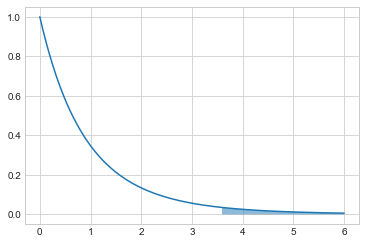

In [61]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

Значение статистики попало в критическую область, поэтому заключаем, что отличие средних зарплат действительно является статистически значимым.

### A/B-тестирование

__A/B-тестирование__ (или _сплит-тестирование_) — маркетинговый метод, который используется для оценки эффективности веб-страниц и управления ими.

При A/В-тестировании сравнивают страницы A и B, имеющие разные элементы дизайна (например, цвета кнопки заказа товара). На каждую страницу случайным образом запускают $50\%$ аудитории сайта и затем сравнивают, какая страница показывает наибольший процент конверсии.

__Пример 9__

Допустим, у нас есть интернет-магазин. Целевая страница этого магазина имеет _коэффициент конверсии_ $2\%$ (т.е. в $2\%$ случаев посещение страницы пользователем заканчивается совершением покупки). 

Специалист хочет увеличить эту цифру до $4\%$. Он предполагает, что изменение дизайна страницы повысит конверсию. К примеру, он думает, что следует изменить цвет кнопки покупки товара с нейтрального синего на агрессивный красный, и это сделает дизайн более ярким и приведет к повышению конверсии. 

Чтобы проверить, маркетолог создает новую версию веб-страницы B, которая отличается от оригинальной страницы A лишь тем, что цвет кнопки покупки товара не синий, а красный. Затем, используя инструменты сплит-тестирования, специалист случайным образом делит трафик между страницами А и В на две приблизительно равные части. При этом одна половина посетителей попадает на страницу A, а вторая — на B.

За нулевую гипотезу здесь берётся предположение, что конверсия на странице B не отличается от конверсии на странице A. Соответственно, обратное утверждение берётся за альтернативную гипотезу. Для проверки таких гипотез как раз подходит дисперсионный анализ.

### Упражнения

__Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?

__Задача 2__

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`?

__Задача 3__

__Квартет Энскомба__ — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

```
{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
```

По каждой паре выборок посчитайте:

1. выборочное среднее и дисперсию каждой выборки,
2. коэффициент корреляции Пирсона и прямую линейной регрессии.

Убедившись в том, что они не практически не отличаются, постройте `scatter plot` по каждой паре выборок.